# Data Mining & Analytics
## Lab 6 (A): Skip Gram models

Available software:
 - Python's Gensim module: https://radimrehurek.com/gensim/ (install using pip)
 - Sklearn’s  TSNE module in case you use TSNE to reduce dimension (optional)
 - Python’s Matplotlib (optional)

_Note: The most important hyper parameters of skip-gram/CBOW are vector size and windows size_

This assignment  will be broadly  split into **2 parts**.

Link: https://colab.research.google.com/drive/1Bgo_bEreQrhc8IzVEjfat-RrxY5u1mXZ

In [0]:
from __future__ import division
from sklearn.cluster import KMeans
from numbers import Number
from pandas import DataFrame
import sys, codecs, numpy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import re
import nltk

from gensim.models import word2vec
from gensim.models import KeyedVectors

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import pandas as pd
import numpy as np 
import gensim

from collections import Counter
from math import sqrt

pd.options.mode.chained_assignment = None 

Q1: Find the **cosine similarities** between the following word pairs/tuples:
- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)

We could use the google library for this but for the sake of learning, I will be computing it manually. We first define our word pairs:

In [0]:
word_pairs = [
              ('France', 'England') ,
              ('smaller', 'bigger'), 
              ('England', 'London'), 
              ('France', 'Rocket'), 
              ('big', 'bigger')
            ]

Now we define the word2vec function which counts the characters in the word, precomputes a set of the different characters and also computes the length of the word vector. It returns a tuple. Another function is defined for calculating the cosine similarity between two vectors.

In [0]:
def word2vec(word):
    # count the characters in word
    cw = Counter(word)
    #print(cw)
    # precomputes a set of the different characters
    sw = set(cw)
    #print(sw)
    # precomputes the "length" of the word vector
    lw = sqrt(sum(c*c for c in cw.values()))
    #print(lw)

    # return a tuple
    return cw, sw, lw

def cosdis(v1, v2):
    # which characters are common to the two words?
    common = v1[1].intersection(v2[1])
    # by definition of cosine distance we have
    return sum(v1[0][ch]*v2[0][ch] for ch in common)/v1[2]/v2[2]

In [0]:
for pair in word_pairs:
    va = word2vec(pair[0])
    vb = word2vec(pair[1])
    print('For the pair {} the cosine similarity is {}.'.format(pair, cosdis(va, vb)))

For the pair ('France', 'England') the cosine similarity is 0.4082482904638631.
For the pair ('smaller', 'bigger') the cosine similarity is 0.2357022603955158.
For the pair ('England', 'London') the cosine similarity is 0.5270462766947299.
For the pair ('France', 'Rocket') the cosine similarity is 0.3333333333333334.
For the pair ('big', 'bigger') the cosine similarity is 0.816496580927726.


**ANS: SEE RESULT FROM CELL ABOVE**

Q2 : Write an expression to extract the vector representations of the words (France, England, smaller, bigger, rocket, big).

Using the google trained model to extract the vector representation from the model.

In [0]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [0]:
word_vectors = model.wv

C:\Users\vicen\Anaconda3\envs\data_mining\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [0]:
goognews_wor = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True, limit=10000)
word_vectorsg = goognews_wor.wv

C:\Users\vicen\Anaconda3\envs\data_mining\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


THIS IS THE ANSWER: After loading the model we index it with our words using the following function: 

In [0]:
# ANSWER FOR QUESTION 2
words = ['France', 'England', 'smaller', 'bigger', 'rocket', 'big']
for word in words:
    print(len(model[word]), model[word])

300 [ 4.85839844e-02  7.86132812e-02  3.24218750e-01  3.49121094e-02
  7.71484375e-02  3.54003906e-02 -1.25976562e-01 -3.86718750e-01
 -1.31835938e-01  2.91748047e-02 -1.44531250e-01 -1.42578125e-01
  1.79687500e-01 -2.75390625e-01 -1.65039062e-01  9.32617188e-02
  1.17187500e-01  1.82617188e-01  6.10351562e-02  1.14257812e-01
  1.82617188e-01 -1.16699219e-01 -3.24707031e-02 -7.56835938e-02
  9.64355469e-03  8.59375000e-02 -2.85156250e-01 -2.55859375e-01
  3.01513672e-02  2.16796875e-01 -1.00097656e-01  2.85644531e-02
 -2.81250000e-01 -8.39843750e-02 -2.02636719e-02 -1.96289062e-01
 -4.78515625e-02  7.12890625e-02 -1.42578125e-01 -1.13525391e-02
  1.16210938e-01  7.22656250e-02  1.47460938e-01  1.50390625e-01
  1.40625000e-01  2.47070312e-01 -1.69921875e-01  7.76367188e-02
 -5.44433594e-02  1.66992188e-01 -1.45507812e-01  2.12402344e-02
 -7.51953125e-02  4.58984375e-02 -2.55859375e-01  1.49414062e-01
 -5.62500000e-01 -1.34765625e-01 -1.87500000e-01 -3.26538086e-03
  8.44726562e-02  1.3

If we wanted to get the vector representation of those words using only a pair of words we could do the following (for which I only make one example since the answer is the one above

In [0]:
A = 'big'
B = 'bigger'

wordsA = list(A) #A.lower().split()
wordsB = list(B) #B.lower().split()

vocab = wordsA + wordsB

vA = np.zeros(len(vocab), dtype=float)
vB = np.zeros(len(vocab), dtype=float)

for w in wordsA:
    i = vocab.index(w)
    vA[i] += 1

print('The vector representation of word A is {}'.format(vA))
    
for w in wordsB:
    i = vocab.index(w)
    vB[i] += 1

print('The vector representation of word B is {}'.format(vB))

The vector representation of word A is [1. 1. 1. 0. 0. 0. 0. 0. 0.]
The vector representation of word B is [1. 1. 2. 0. 0. 0. 0. 1. 1.]


**ANS: SEE THREE CELL ABOVE**

Q3: Repeat the exercise from Q1 by finding the euclidean distances between the word pairs.

The eculideand distance is "the "ordinary" (i.e. straight-line) distance between two points in Euclidean space". In other words, the euclidean distance is given by:

$$ Euclidean \space Distance = \sqrt{(v1 - v2)^2} $$

In [0]:
#YOUR CODE HERE
for pair in word_pairs:
    print('For the pair {} the euclidean distance is {}.'.format(pair, np.linalg.norm(model[pair[0]]-model[pair[1]])))

For the pair ('France', 'England') the euclidean distance is 3.015106678009033.
For the pair ('smaller', 'bigger') the euclidean distance is 1.8618743419647217.
For the pair ('England', 'London') the euclidean distance is 2.875283718109131.
For the pair ('France', 'Rocket') the euclidean distance is 3.892071008682251.
For the pair ('big', 'bigger') the euclidean distance is 1.9586496353149414.


**ANS: SEE CELL ABOVE**

Q4: What is the relationship between the magnitude of individual vectors, the vectors themselves and the cosine distance for any pair of words. Use any tuple in Q1 as an example to support your answer.

The magnitude of an individual vector is given by:

$$ Vector \space \lvert \lvert (a,b,...,n) \rvert \rvert = \sqrt{a^2 + b^2 + ... + n^2} $$

The cosine similarity though is a measurement of orientation and NOT magnitude. When calculating the cosine similarity between two vectors (two words, two sentences, or two documents), we take into consideration the magnitude's direction to be able to calculate the angle between vectors as seen in the following image:

<img src="https://www.machinelearningplus.com/wp-content/uploads/2018/10/3d_projection.png" width=500, height=100>

Let's use the vector representation of the words big and bigger calculated before:

In [0]:
#Converting to DataFrames
va_df = pd.DataFrame(vA) 
vb_df = pd.DataFrame(vB)

#Magnitude Calculation
va_df = va_df**2
vb_df = vb_df**2

mag_big = va_df.sum()
mag_bigger = vb_df.sum()

print('The vector representations for big is {} and for bigger is {}.'.format(vA,vB))
print('The magnitude for big is {} and for bigger is {}.'.format(mag_big[0], mag_bigger[0]))
print('The cosines similarity between these two vectors is {}.'.format(
    np.dot(vA, vB) / (np.linalg.norm(vA) * np.linalg.norm(vB))))

The vector representations for big is [1. 1. 1. 0. 0. 0. 0. 0. 0.] and for bigger is [1. 1. 2. 0. 0. 0. 0. 1. 1.].
The magnitude for big is 3.0 and for bigger is 8.0.
The cosines similarity between these two vectors is 0.8164965809277259.


To verify that the cosine similarity is independent of the magnitude we can multiple each vector times 2 and we will see that the similarity is unchanged:

In [0]:
print('The cosines similarity between these two vectors is {}, therefore unchanged.'.format(
    np.dot(vA*2, vB*2) / (np.linalg.norm(vA*2) * np.linalg.norm(vB*2))))

The cosines similarity between these two vectors is 0.8164965809277259, therefore unchanged.


**ANS: SEE ALL ABOVE**

Q5: Time to dabble with the power of Word2Vec. Find the 2 closest words  for the following conditions:  
- (King - Queen)
- (bigger - big + small)
- (man + programmer - woman)
- (school + shooting - guns)
- (Texas + Milwaukee – Wisconsin)

In [0]:
king_queen = model['King'] - model['Queen']
print('The two closest words for [King - Queen] and their similarities are {}'.format(model.most_similar(positive=[king_queen], topn=2)))

The two closest words for [King - Queen] and their similarities are [('L._Marcellino', 0.3117591142654419), ('M._Levin_D-Mich.', 0.31119126081466675)]


In [0]:
bigger_big_small = model['bigger'] - model['big'] + model['small']
print('The two closest words for [bigger - big + small] and their similarities are {}'.format(model.most_similar(positive=[bigger_big_small], topn=2)))

The two closest words for [bigger - big + small] and their similarities are [('larger', 0.7870662212371826), ('smaller', 0.768511176109314)]


In [0]:
man_prog_wom = model['man'] + model['programmer'] - model['women']
print('The two closest words for [man - programmer - woman] and their similarities are {}'.format(model.most_similar(positive=[man_prog_wom], topn=2)))

The two closest words for [man - programmer - woman] and their similarities are [('programmer', 0.7885046005249023), ('computer_programmer', 0.5461097955703735)]


In [0]:
sch_sho_gun = model['school'] + model['shooting'] - model['guns']
print('The two closest words for [school + shooting - guns] and their similarities are {}'.format(model.most_similar(positive=[sch_sho_gun], topn=2)))

The two closest words for [school + shooting - guns] and their similarities are [('school', 0.5944540500640869), ('shooting', 0.5278399586677551)]


In [0]:
tex_mil_wis = model['Texas'] + model['Milwaukee'] - model['Wisconsin']
print('The two closest words for [Texas + Milwaukee - Wisconsin] and their similarities are {}'.format(model.most_similar(positive=[tex_mil_wis], topn=2)))

The two closest words for [Texas + Milwaukee - Wisconsin] and their similarities are [('Houston', 0.7753652334213257), ('Dallas', 0.717473030090332)]


We could also use the method described in class but the previous method is clearer for learning since we substract and add the vectors manually. This is the alternative method:

In [0]:
#YOUR CODE HERE
model.most_similar(positive=['Texas','Milwaukee'], negative=['Wisconsin'], topn=4)

[('Houston', 0.7767744064331055),
 ('Fort_Worth', 0.7270511388778687),
 ('Dallas', 0.7189089059829712),
 ('San_Antonio', 0.7151918411254883)]

**ANS: SEE ALL CELLS ABOVE**

Q6: Using the vectors for the words in the Google News dataset, explore the semantic representation of these words through K-means clustering and explain your findings.

Do to the size of the vocabulary in the google news model we will limit ourself to only 10,000 points. 

In [0]:
#X = model[model.vocab]
X = goognews_wor[goognews_wor.vocab]

In [0]:
from sklearn import cluster
from sklearn import metrics
 
NUM_CLUSTERS=3

kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
# print ("Cluster id labels for inputted data")
# print (labels)
# print ("Centroids data")
# print (centroids)
 
# print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

-86681.25
Silhouette_score: 
0.009302334


In [0]:
for i in range(0,3):
    vec = centroids[i]
    similar = goognews_wor.most_similar(positive=[vec], topn=5)
    print('The 5 closest words to the centroid belonging to cluster {} are {}'.format(i, similar))

The 5 closest words to the centroid belonging to cluster 0 are [('Scott', 0.5127185583114624), ('Brandon', 0.5088798999786377), ('Curtis', 0.5047894716262817), ('Ryan', 0.5045835375785828), ('Morgan', 0.4901310205459595)]
The 5 closest words to the centroid belonging to cluster 1 are [('do', 0.5619264841079712), ('just', 0.5429888367652893), ('even', 0.5399409532546997), ('anyway', 0.5264552235603333), ('the', 0.5210249423980713)]
The 5 closest words to the centroid belonging to cluster 2 are [('government', 0.5201106071472168), ('governments', 0.4802962839603424), ('lawmakers', 0.4624422788619995), ('economic', 0.45784878730773926), ('companies', 0.45443645119667053)]


Base on the 5 closest points to the cluster centroids seen above. It can be seen that one of the clusters is comprised of names (ex. Scott, Brandon, etc.) the second cluster contains common words like do, just, the, and the last cluster contains words related to the economy and the goverment (ex. government, companies, economic). This results are not in any way representative of the real vocabulary since it's only sampling 10000 words but the framework reamins the same. The results for 3 clusters are still good given the divisions. 

In [0]:
# vec = centroids[1]
# similars = model.most_similar(positive=[vec], topn=5)

# model.most_similar(positive=['Texas','Milwaukee'], negative=['Wisconsin'], topn=4)

Q7: What loss function does the skipgram model use and briefly describe what this function is minimizing .

In [0]:
There are several loss functions that we can incorporate to the skipgram model including the Negative Sampling (NEG), Noise Contrastive Estimation (NCE), and Cross Entropy. Assuming the question asks about cross entropy since it's the loss function that we talked about in class. 

This loss function measures the cross entropy between the predicted probabilities $p$ and the true binary labels $y$. The cross entropy is then given by:

$$ H(p,q) = - \sum_x p(x)\space log \space q(x) $$

The true label $y_i$ is 1 only when $w_i$ is the real output word but 0 when is any other word that is not the real. The loss funciton, when using cross entropy, has a parameter config $\theta$. The overall loss functions aims to minimize the cross entropy between the prediction and the groudn truth (the higher the cross entropy the smaller the similarity between two distributions. The loss function is given by:

$$ L = - \sum_{i=1}^{V} y_i \space log \space p(w_i \lvert w_I) =  -log \space p(w_O \lvert w_I)$$

where:

$$ p(w_O \lvert \rvert w_I) = \frac{exp(v_{w_O}^" \intercal v_{w_I})}{\sum_{i=1}^{V} exp(v_{w_O}^" \intercal v_{w_I})} $$

Everytime we star training a model using back-progapagation with stochastic gradient descent, we compute the gradient of $L$.

# Lab #6 Part 2

*** Task #1. Generate embeddings from the corpus you have chosen. ***

We will first load the brown text corpus from nlkt package which contains millions of words from text from 500 sources. All sources are categorized by genres.

In [0]:
from nltk.corpus import brown
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\vicen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

Some of the categories included in corpus include:

In [0]:
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


Now we will train a model on the entire brown corpus and selecting a 300-dimensional space with a 10 word window as training parameters:

In [0]:
model = gensim.models.Word2Vec(brown.sents(), size=300, window=10)

In [0]:
model.save('brown.embedding')
#new_model = gensim.models.Word2Vec.load('brown.embedding')

In [0]:
print('The number of dimensions of a word are {} dimensions.'.format(len(model.wv['car'])))

The number of dimensions of a word are 300 dimensions.


Example of a vector representation for the word "car":

In [0]:
model.wv['car']

array([ 3.01423632e-02, -5.08614898e-01, -3.54073346e-02,  5.86763620e-01,
        2.27046516e-02,  2.34986946e-01, -9.41787139e-02, -3.08995605e-01,
        2.17448100e-01,  3.35908294e-01,  9.29968283e-02, -4.27558243e-01,
       -8.97593703e-03, -1.53234199e-01, -1.23915784e-01, -2.50167046e-02,
       -1.39530778e-01,  1.70925900e-01,  1.67409092e-01,  6.26533866e-01,
       -1.96892233e-03, -1.94128454e-01,  1.58566043e-01,  4.34174031e-01,
        1.37607485e-01,  3.64103653e-02,  1.04063638e-01, -4.85863417e-01,
        3.16779941e-01,  3.47144961e-01,  5.48908971e-02, -4.22861934e-01,
        3.83344218e-02,  2.28667930e-01,  8.05643573e-02,  6.72091424e-01,
        1.21196881e-01,  3.71744573e-01,  6.61419630e-01,  4.32303846e-02,
       -2.14071684e-02, -5.12705207e-01, -4.03049856e-01, -6.16596639e-01,
        3.01265508e-01,  1.53036609e-01,  4.06623125e-01, -1.42013982e-01,
       -2.46862888e-01, -1.25938565e-01,  7.65575841e-02, -1.94984302e-02,
        7.50071481e-02,  

*** Task #2. Based on your knowledge or understand of the text corpus you have chosen, form 3 hypotheses of analogies or relationships you expect will hold and give a reason why. Experimentally validate these hypotheses. ***

The three hypothesis will be investigated:
- Similar words with different endings will be enough to cause higher dissimalrities since they will not usually apear in the same context since they use different pronouns (ex. drive will not appear with driving withing the specified training window).
- Words in the relgion category will have high dissimilarity with words on science due to their appearance in different contexts.
- Romance will have higher use of the pronoun "I" than the category "news" since writers in "news" you don't usually write 1st person pronouns.

For our first hypothesis we will select the words drive, swim, drink, and run.

In [0]:
print(model.wv.similarity('drive','driving'))
print(model.wv.similarity('swim','swimming'))
print(model.wv.similarity('drink','drinking'))
print(model.wv.similarity('run','running'))
print(model.wv.similarity('walk','walking'))

0.7631310170400888
0.7043257527779162
0.8013006384881299
0.7043766974229512
0.8767004380622725


After printing their cosine similarities in the 300-dimensional space, we notice that present simple and present continuous words are highly similar! This resulted opposite to the original hypothesis. A sample sentence pair where this occurs is in the following: "I like to walk. When I was walking I saw a dog."

For the second hypothesis, we will print the cosine similarity of common words used in the context of "religion" and "science".

In [0]:
print(model.wv.similarity('science','religion'))
print(model.wv.similarity('molecule','science'))
print(model.wv.similarity('science','pray'))
print(model.wv.similarity('science','Christian'))

0.8871407692507669
0.6443322735223489
0.4878165707933009
0.8626780083066893


We can see that the model does not perform very well. Words like science and Christian are highly similar. We can infer from human perception that these words should not be similar. Furthermore, the word molecule and science should have higher similarity but instead are poorly related in the vector space. This means our hypothesis was wrong. To further inform ourselves let's look at the top 5 similar words for relgion and science and see if the model at least has similar words:

In [0]:
model.wv.most_similar(positive=['religion'], topn = 5)

[('consistent', 0.9475144743919373),
 ('affairs', 0.9404977560043335),
 ('moral', 0.9388400912284851),
 ('literature', 0.9369181990623474),
 ('behavior', 0.9258801341056824)]

In [0]:
model.wv.most_similar(positive=['science'], topn = 5)

[('modern', 0.9400120377540588),
 ('socialism', 0.9365095496177673),
 ('Christianity', 0.9342421293258667),
 ('Biblical', 0.9327983260154724),
 ('communication', 0.9312307834625244)]

The model clearly needs more training and the text corpus probably needs to be more carefully selected to be a real world representation of these genres. Words like Christianity and Biblical should not be the part of the highest similar words for "science".

For our third hypothesis we will take a look at the pronoun frequency in all categories and then take a close look to the "news" and "romance" category:

In [0]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
pronouns = ['I', 'you','he', 'she', 'it', 'we', 'they']
cfd.tabulate(conditions=genres, samples=pronouns)

                   I  you   he  she   it   we they 
           news  179   55  451   42  363   77  205 
       religion  155  100  137   10  264  176  115 
        hobbies  154  383  155   21  476  100  177 
science_fiction   98   81  139   36  129   30   53 
        romance  951  456  702  496  573   78  168 
          humor  239  131  146   58  162   32   70 


We can clearly observe that the romance category has a higher frequency of "I" (951 counts) than the "news" category (179 counts). News are usually written in third person while romance are usually written in first person. This comfirms our third hypothesis.

Task #3. Use T-SNE or PCA to reduce the dimensionality of the vectors to two dimensions for:
- The GoogleNews corpus. Feel free to down sample it to 10 - 20k words based on frequency.
- The embeddings you just generated.

The size for plotting will not be 10 to 20k words as this will make the graph saturated and unable to read. Therefore, I will limit the model to 500 words and increase the figure size for reading. This will be done for both the GoogleNews corpus and for the just generated embedding from the brown corpus.

Also, I will be using matplotlib since the d3-scatterplot visualization tool requires local installation and we are working in colab.

For the GooglNews corpus:

In [0]:
visual = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True, limit=200)

In [0]:
labels = []
count = 0
max_count = 200
X = np.zeros(shape=(max_count,len(visual['percent'])))

for term in visual.wv.vocab:
    X[count] = visual[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

pca = PCA(n_components=40)
X_50 = pca.fit_transform(X)

visual_tsne = TSNE(n_components=2, random_state=0)
Y = visual_tsne.fit_transform(X_50)

C:\Users\vicen\Anaconda3\envs\data_mining\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


For the Brown Corpus, for the purposes of exploring new methods, we will first use PCA to reduce to 40 dimensions and then TSNE to 2 dimensions follow by the plotting:

In [0]:
labels = []
count = 0
max_count = 200
X = np.zeros(shape=(max_count,len(model['science'])))

for term in model.wv.vocab:
    X[count] = model[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

pca = PCA(n_components=40)
X_50 = pca.fit_transform(X)

model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

# # Show the scatter plot
# import matplotlib.pyplot as plt
# plt.figure(figsize=(15, 15)) 
# plt.scatter(Y[:,0], Y[:,1], 20)

# # Add labels
# for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
#     plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)
    
# plt.show()

C:\Users\vicen\Anaconda3\envs\data_mining\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
C:\Users\vicen\Anaconda3\envs\data_mining\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


Task #4. Using this (Links to an external site.)Links to an external site. library, visualize both reduced datasets from the step above and explore the visualization.

For the GoogleNews Corpus:

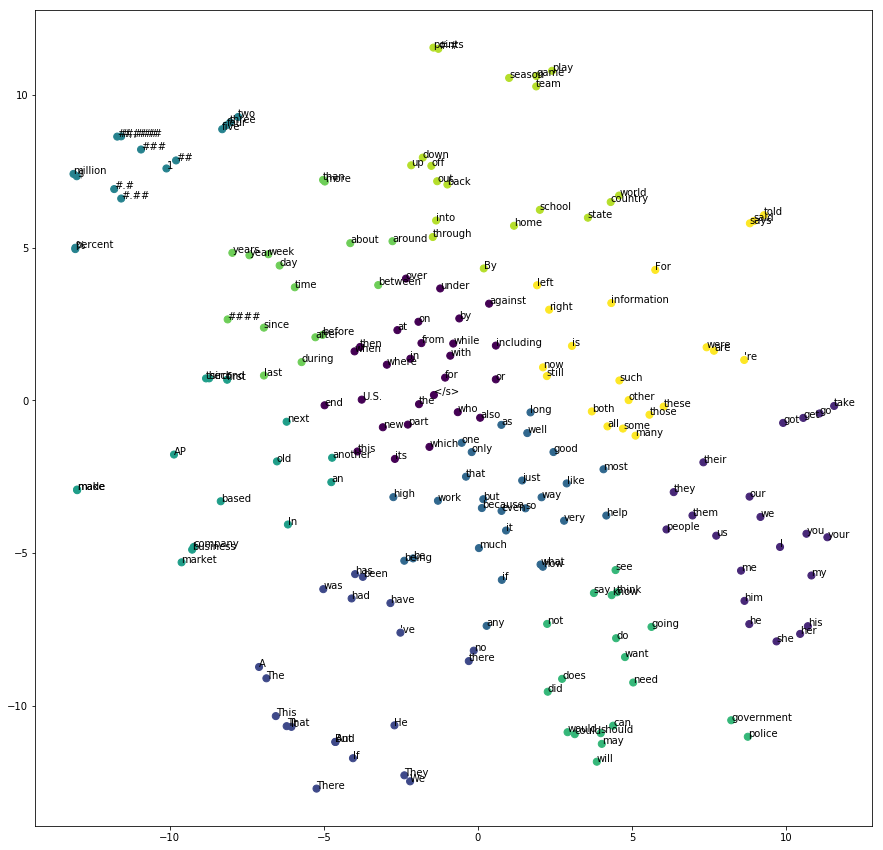

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_init=300)
kmeans.fit(Y)
y_kmeans = kmeans.predict(Y)

plt.figure(figsize=(15, 15)) 
plt.scatter(Y[:, 0], Y[:, 1], c=y_kmeans, s=50)#, cmap='Blues')
centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)#, alpha=0.5);

# Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)
    
plt.show()

For the Brown Corpus:

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_init=300)
kmeans.fit(Y)
y_kmeans = kmeans.predict(Y)

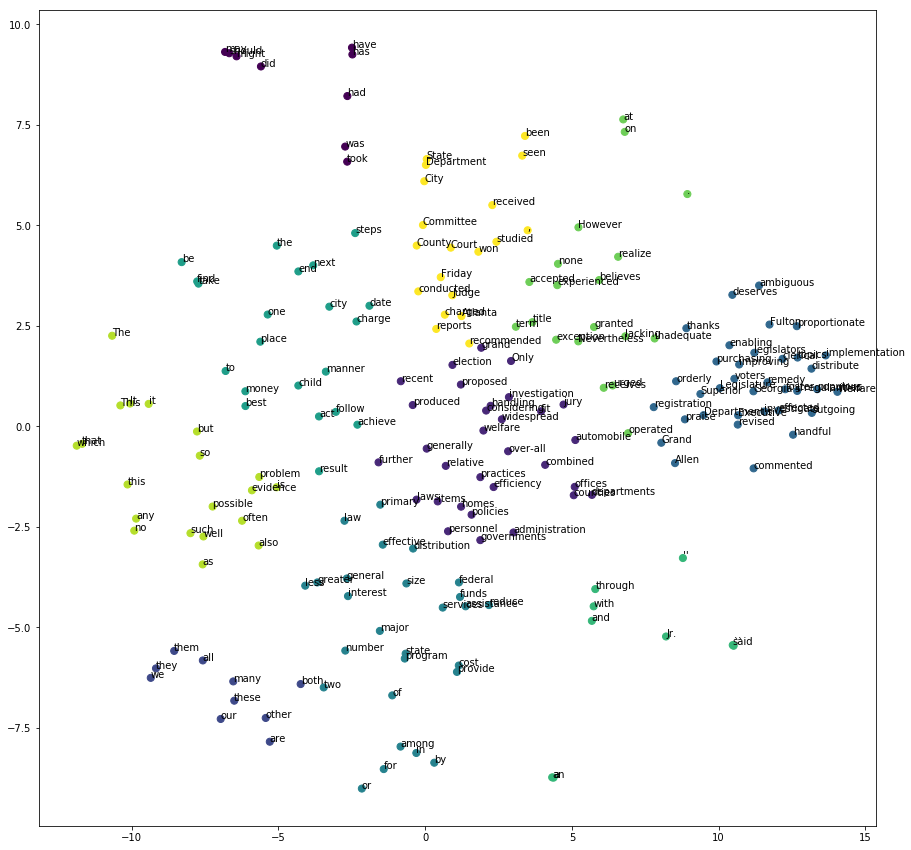

In [0]:
plt.figure(figsize=(15, 15)) 
plt.scatter(Y[:, 0], Y[:, 1], c=y_kmeans, s=50)#, cmap='Blues')
centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)#, alpha=0.5);

# Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)
    
plt.show()

We used Matplotlib and Sklearn Kmeans insetad of 3d-scatterplot since the latter requires local installation. Also it is valuable to learn how clustering algorithms like Kmeans will perform in data after reducing dimensionality via TSNE or PCA or both. 

For the GoogleNews Model, with this limited amount of plotted data, one could see that pronouns are located at the center right part of the graph with the color purple. These cluster includes words like "I", "he", "we", "my", etc. You can also notice that in the top left part of the graph, in aqua color, there are terms related to numbers like "million", "percent", "one", "two", and "#". 

For the brown corpus, we can notice also a small goverment related words cluster around (-2.5,3) in purple color with words like "governments", "administration", "policies", "laws" etc. Just beneath this cluster the aqua color cluster contians also similar words related to government lik "federal", "funds", "services", "state", "program", etc. This means that the clustering algorithm needs to be trained better to associate these two groups of words or change the dimensionality reduction parametesr and do clustering in higher order dimensions.

# IGNORE AFTER THIS

In [0]:
#visual_model = KeyedVectors.load_word2vec_format('brown.embedding', limit=200)
visual_model = gensim.models.Word2Vec.load('brown.embedding')

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(13, 13)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.show()

C:\Users\vicen\Anaconda3\envs\data_mining\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


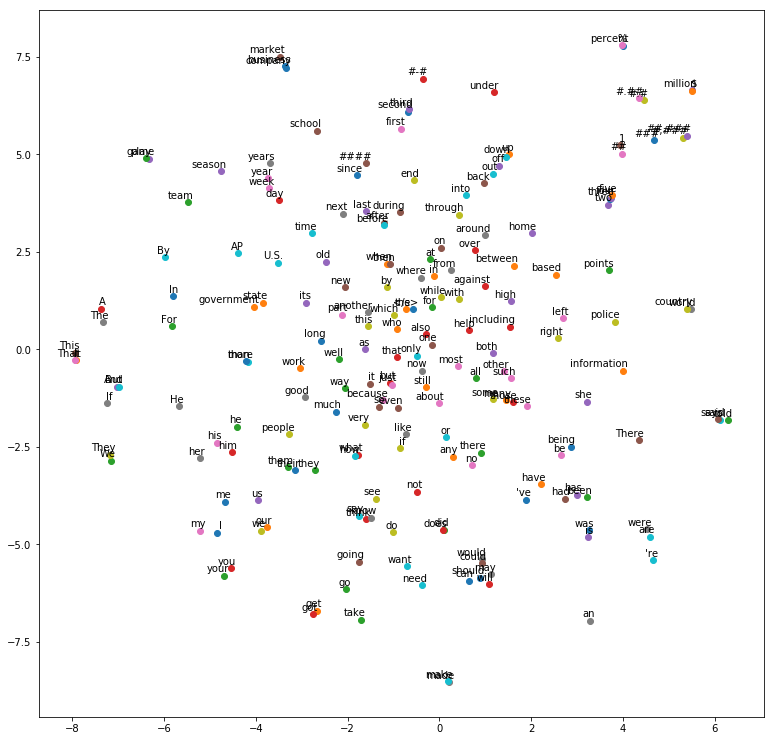

In [0]:
tsne_plot(visual)